In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Przygotowanie danych

In [2]:
# Wczytanie danych
df = pd.read_csv('files/dataset.csv')
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Przekształcenie daty na format datowy
df['Date'] = pd.to_datetime(df['Date'])

# Ustawienie indeksu daty
df.set_index('Date', inplace=True)
df.head()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
Date,,,,,,,,,,
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0,67610.0,110.28,110.5,13.7,3.6
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0,67610.0,112.79,106.2,15.1,4.3
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0,69213.0,111.05,106.5,19.3,4.5
2011-05-01,1962587.0,1485.250000,2.7942,116.614998,2006688.0,69213.0,106.81,107.9,17.0,5.0
2011-06-01,1883299.0,1542.400024,2.7660,114.529999,2254963.0,69213.0,105.07,102.5,20.0,4.2


### Zmienne

| Zmienna | Opis                                                                                          | Jednostka          |
|------------|-----------------------------------------------------------------------------------------------|--------------------|
| Unemployed| Bezrobotni zarejestrowani w Polsce                                                            | osoba              |
| Gold (Close)| Kurs złota wyrażony poprzez kurs zamknięcia                                                   | USD                |
| USD (Close)| Kurs walutowy USD/PLN wyrażony poprzez kurs zamknęcia                                         | PLN                |
| Oil (Close)| Kurs ropy brentowej wyrażony poprzez kurs zamknięcia                                          | USD                |
| Tourists| Liczba osób korzystających z obiektów noclegowych posiadających 10 lub więcej miejsc noclegowych | osoba              |
| Cars| Pojazdy samochodowe fabrycznie nowe zarejestrowane po raz pierwszy na terytorium Polski       | sztuka             |
| ImportExport| Średnia wartość importu i eksportu dla różnych działów produktów wyrażona w stosunku do analogicznego okresu z roku poprzedniego | Index (RP[^1]=100) |
| IndustryProd| Produkcja sprzedana przemysłu/Wartość wyrobów przemysłowych, które zostały wyprodukowane i sprzedane wyrażona w stosunku do analogicznego okresu z roku poprzedniego| Index (RP[^1]=100) |
| CommerceInvest| Średnie przewidywane nakłady inwestycyjne w różnych sektorach handlu | mln PLN            |
| Inflation| Wskaźnik cen towarów i usług konsumpcyjnych w stosunku do analogicznego miesiąca poprzedniego roku | %                  |

[^1]: RP  - Rok Poprzedni

# Analiza wstępna

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid")

### Wizualizacja danych

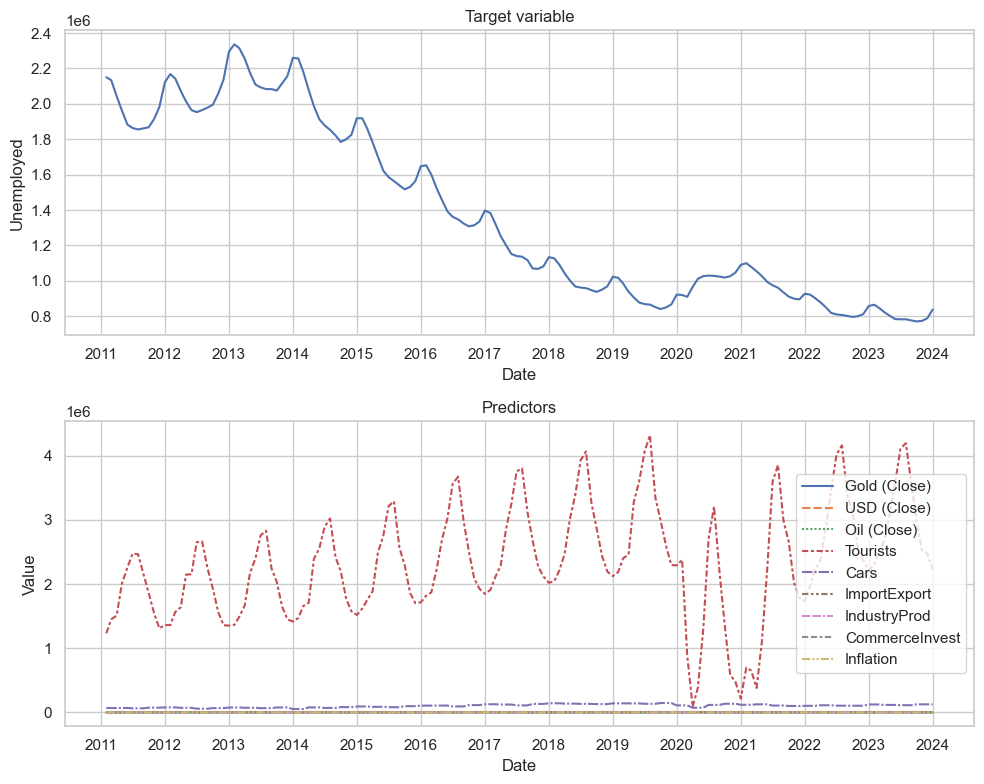

In [4]:
# Wizualizacja danych, aby zrozumieć podstawowe wzorce i trendy
fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(df['Unemployed'], ax=ax[0])
sns.lineplot(df.drop('Unemployed', axis=1), ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

In [5]:
df.describe()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
count,1.560000e+02,156.000000,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.377866e+06,1507.458014,3.675339,77.875192,2.325535e+06,101711.730769,104.214038,104.639103,10.550641,3.665385
std,5.043236e+05,274.202333,0.444954,26.037675,8.656406e+05,25988.392426,8.755217,6.870870,7.948370,4.648908
min,7.704460e+05,1063.800049,2.714000,22.760000,8.638600e+04,52522.000000,91.060000,75.400000,-30.800000,-1.600000
25%,9.327835e+05,1277.625031,3.298413,55.753750,1.746958e+06,77176.000000,98.425000,101.200000,6.400000,0.700000
50%,1.138056e+06,1438.500000,3.758650,75.334999,2.264302e+06,105236.000000,101.085000,104.500000,12.700000,2.400000
75%,1.879715e+06,1768.625000,3.964137,105.634503,2.866874e+06,125273.000000,107.672500,107.525000,16.325000,4.300000
max,2.336686e+06,2071.000000,4.757700,126.199997,4.319590e+06,146113.000000,130.000000,144.200000,21.100000,18.400000


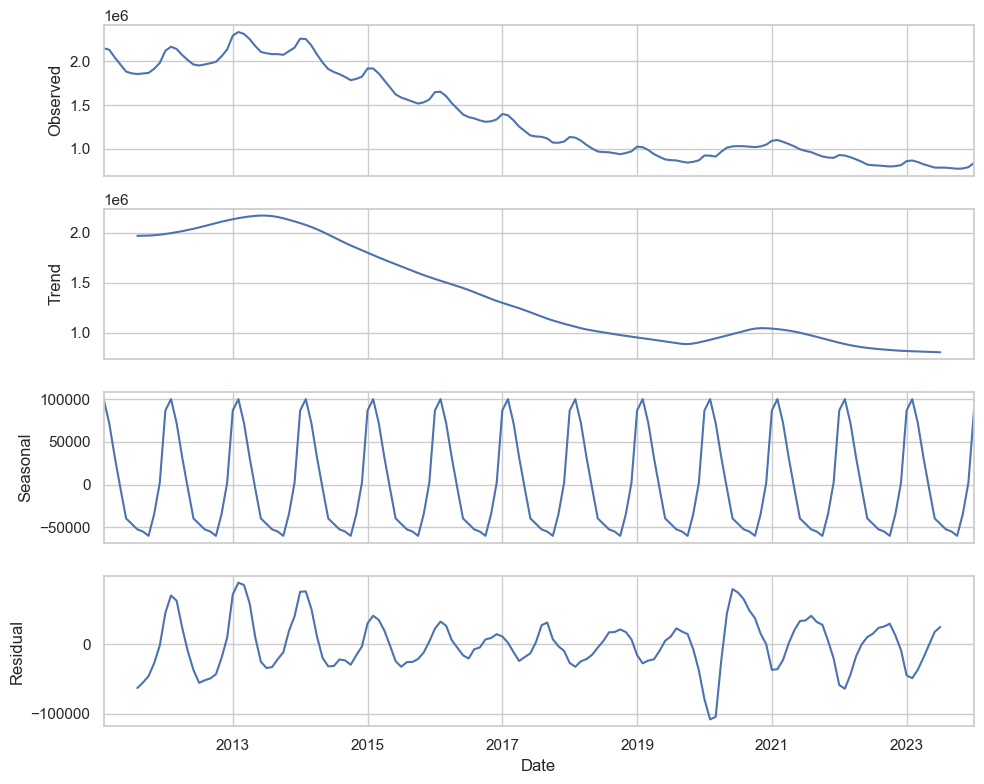

In [6]:
# Dekompozycja szeregu czasowego

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Załóżmy, że mamy ramkę danych df z kolumną 'Unemployed'
# df = pd.read_csv('path_to_your_data.csv', parse_dates=['Date'], index_col='Date')

# Wykonanie dekompozycji
result = seasonal_decompose(df['Unemployed'], model='additive', period=12)  # okres = 12 dla danych miesięcznych

# Wizualizacja wyników
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Stacjornarność szeregu

Sprawdzenie stacjonarności szeregu czasowego jest kluczowym krokiem w analizie szeregów czasowych. Stacjonarność oznacza, że statystyki (średnia, wariancja) szeregu czasowego nie zmieniają się w czasie. Jest to ważne, ponieważ wiele modeli analizy szeregów czasowych, takich jak modele ARIMA, zakłada stacjonarność danych.

Test Augmented Dickey-Fuller (ADF) jest jednym z najczęściej używanych testów do sprawdzania stacjonarności. Test ADF sprawdza hipotezę zerową, że szereg czasowy ma jednostkowy pierwiastek (czyli jest niestacjonarny). Hipoteza alternatywna mówi, że szereg jest stacjonarny.

TODO - dopisać dlaczego stacjonarność jest ważna

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [8]:
# Przeprowadzenie testu ADF
result = adfuller(df['Unemployed'])

# Wyniki testu
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretacja wyników
if result[1] < 0.05:
    print("Odrzucamy hipotezę zerową. Szereg czasowy jest stacjonarny.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy jest niestacjonarny.")

ADF Statistic: -1.2259700615470899
p-value: 0.6623254821686926
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy jest niestacjonarny.


Szereg czasowy po różnicowaniu pierwszego rzędu:
ADF Statistic: -2.2395497468121413
p-value: 0.1922054715647708
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}

Szereg czasowy po różnicowaniu drugiego rzędu:
ADF Statistic: -4.374065385788078
p-value: 0.0003298241942308723
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


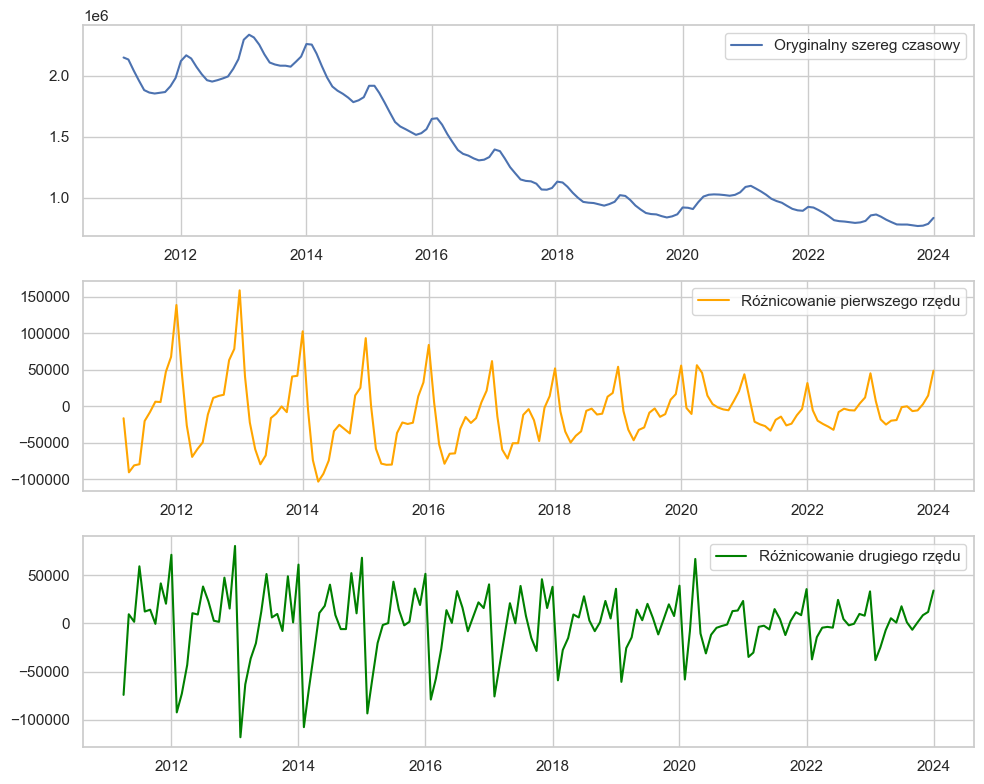

Odrzucamy hipotezę zerową. Szereg czasowy po różnicowaniu drugiego rzędu jest stacjonarny.


In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Załóżmy, że mamy ramkę danych df z kolumną 'data' reprezentującą nasz szereg czasowy
# df = pd.read_csv('path_to_your_data.csv')

# Wykonanie różnicowania pierwszego rzędu
df['data_diff1'] = df['Unemployed'].diff().dropna()

# Sprawdzenie stacjonarności po różnicowaniu pierwszego rzędu
result_diff1 = adfuller(df['data_diff1'].dropna())
print('Szereg czasowy po różnicowaniu pierwszego rzędu:')
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])
print('Critical Values:', result_diff1[4])

# Jeśli szereg nadal jest niestacjonarny, wykonaj różnicowanie drugiego rzędu
if result_diff1[1] >= 0.05:
    df['data_diff2'] = df['data_diff1'].diff().dropna()

    # Sprawdzenie stacjonarności po różnicowaniu drugiego rzędu
    result_diff2 = adfuller(df['data_diff2'].dropna())
    print('\nSzereg czasowy po różnicowaniu drugiego rzędu:')
    print('ADF Statistic:', result_diff2[0])
    print('p-value:', result_diff2[1])
    print('Critical Values:', result_diff2[4])

    # Wykresy do wizualizacji
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    axes[0].plot(df['Unemployed'], label='Oryginalny szereg czasowy')
    axes[0].legend(loc='best')
    axes[1].plot(df['data_diff1'], label='Różnicowanie pierwszego rzędu', color='orange')
    axes[1].legend(loc='best')
    axes[2].plot(df['data_diff2'], label='Różnicowanie drugiego rzędu', color='green')
    axes[2].legend(loc='best')
    plt.tight_layout()
    plt.show()

    # Interpretacja wyników po różnicowaniu drugiego rzędu
    if result_diff2[1] < 0.05:
        print("Odrzucamy hipotezę zerową. Szereg czasowy po różnicowaniu drugiego rzędu jest stacjonarny.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy po różnicowaniu drugiego rzędu jest niestacjonarny.")
else:
    print("Szereg czasowy jest stacjonarny po różnicowaniu pierwszego rzędu.")


In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.preprocessing import StandardScaler

# Załóżmy, że mamy ramkę danych df z kolumną 'target' (zmienna zależna) i zmiennymi objaśniającymi
# df = pd.read_csv('path_to_your_data.csv')

def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05

def make_stationary(series):
    diff_series = series.diff().dropna()
    return diff_series

# Lista zmiennych objaśniających
explanatory_vars = df.columns.drop(['data_diff1', 'data_diff2'])


# Sprawdzenie stacjonarności zmiennych objaśniających i różnicowanie jeśli konieczne
for var in explanatory_vars:
    temp_series = df[var]
    diff_count = 0

    while not check_stationarity(temp_series) and diff_count < 2:
        temp_series = make_stationary(temp_series)
        diff_count += 1

    if not check_stationarity(temp_series):
        raise Exception(f"Zmienna {var} nie jest stacjonarna po różnicowaniu {diff_count} rzędu")

    df[f'{var}_diff'] = temp_series
    if diff_count > 0:
        print(f'Zmienna {var}:\tWykonano różnicowanie {diff_count} rzędu')
    else:
        print(f'Zmienna {var}:\tNie wykonano różnicowania.')

# Usunięcie pierwszych wierszy z brakującymi wartościami powstałymi po różnicowaniu
df.dropna(inplace=True)

# # Standaryzacja zmiennych
# scaler = StandardScaler()

# # Przygotowanie danych do standaryzacji
# X = df[[f'{var}_diff' for var in explanatory_vars]]
# y = df['target_diff']

# # Standaryzacja zmiennych objaśniających
# X_scaled = scaler.fit_transform(X)

# # Teraz X_scaled jest gotowy do użycia w modelu


Zmienna Unemployed:	Wykonano różnicowanie 2 rzędu
Zmienna Gold (Close):	Wykonano różnicowanie 1 rzędu
Zmienna USD (Close):	Wykonano różnicowanie 1 rzędu
Zmienna Oil (Close):	Wykonano różnicowanie 1 rzędu
Zmienna Tourists:	Wykonano różnicowanie 1 rzędu
Zmienna Cars:	Wykonano różnicowanie 1 rzędu
Zmienna ImportExport:	Wykonano różnicowanie 1 rzędu
Zmienna IndustryProd:	Nie wykonano różnicowania.
Zmienna CommerceInvest:	Nie wykonano różnicowania.
Zmienna Inflation:	Wykonano różnicowanie 1 rzędu


In [11]:
cols = ['Gold (Close)_diff',
       'USD (Close)_diff', 'Oil (Close)_diff', 'Tourists_diff', 'Cars_diff',
       'ImportExport_diff', 'IndustryProd', 'CommerceInvest',
       'Inflation_diff']
X = df[cols]
y = df['Unemployed_diff']

In [12]:
X

,Gold (Close)_diff,USD (Close)_diff,Oil (Close)_diff,Tourists_diff,Cars_diff,ImportExport_diff,IndustryProd,CommerceInvest,Inflation_diff
Date,,,,,,,,,
2011-04-01,-2.599976,-0.07300,3.279999,60056.0,1603.0,-1.74,106.5,19.3,0.2
2011-05-01,57.150024,-0.02820,-2.084999,496654.0,0.0,-4.24,107.9,17.0,0.5
2011-06-01,57.150024,-0.02820,-2.084999,248275.0,0.0,-1.74,102.5,20.0,-0.8
2011-07-01,-60.099976,-0.05200,-2.760002,217567.0,-5591.0,0.63,101.7,21.1,-0.1
2011-08-01,136.699951,0.08790,5.040001,-6550.0,0.0,2.89,107.7,18.2,0.2
...,...,...,...,...,...,...,...,...,...
2023-09-01,-0.899902,0.09400,3.639999,-627607.0,0.0,-7.24,96.7,4.9,-1.9
2023-10-01,19.500000,0.03925,-1.960003,-585371.0,12991.0,0.07,102.0,7.4,-1.6
2023-11-01,19.500000,0.03925,-1.960003,-456678.0,0.0,-0.97,99.7,4.9,0.0


### Standaryzacja zmiennych

Różnicowanie jest techniką, która służy do usunięcia trendu i sezonowości w celu uzyskania stacjonarności szeregu czasowego. Podczas różnicowania odejmujemy poprzednią wartość od bieżącej, co zmienia wartości w szeregu czasowym. Różnicowanie może zmienić skalę danych, dlatego ważne jest, aby wykonać standaryzację po różnicowaniu, aby dostosować dane do tej samej skali.

In [13]:
# Standaryzacja danych, aby ułatwić interpretację wyników
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modified = pd.DataFrame(X_scaled, columns=cols, index=df.index)
modified['target'] = y
modified

,Gold (Close)_diff,USD (Close)_diff,Oil (Close)_diff,Tourists_diff,Cars_diff,ImportExport_diff,IndustryProd,CommerceInvest,Inflation_diff,target
Date,,,,,,,,,,
2011-04-01,-0.126954,-0.789292,0.682746,0.122614,0.145119,-0.761692,0.277661,1.105237,0.307663,-74083.0
2011-05-01,0.995531,-0.345975,-0.358667,1.096367,-0.044229,-1.952658,0.481279,0.816347,0.760339,9471.0
2011-06-01,0.995531,-0.345975,-0.358667,0.542403,-0.044229,-0.761692,-0.304105,1.193161,-1.201257,1641.0
2011-07-01,-1.207170,-0.581487,-0.489693,0.473914,-0.704643,0.367343,-0.420458,1.331325,-0.145013,59164.0
2011-08-01,2.489985,0.802888,1.024384,-0.025938,-0.044229,1.443976,0.452190,0.967073,0.307663,12285.0
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,-0.095016,0.863251,0.752627,-1.411094,-0.044229,-3.381817,-1.147664,-0.703466,-2.861068,-6572.0
2023-10-01,0.288224,0.321474,-0.334403,-1.316894,1.490281,0.100567,-0.376825,-0.389455,-2.408392,976.0
2023-11-01,0.288224,0.321474,-0.334403,-1.029868,-0.044229,-0.394875,-0.711340,-0.703466,0.005879,8498.0


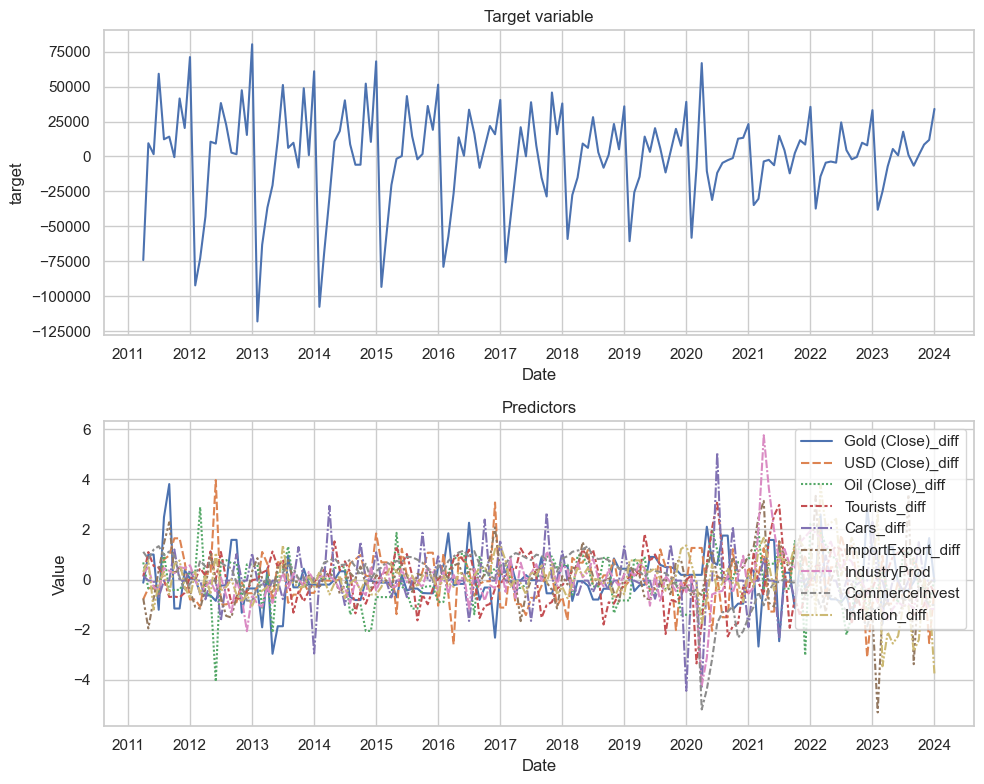

In [14]:
# Wizualizacja danych, aby zrozumieć podstawowe wzorce i trendy
fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(modified['target'], ax=ax[0])
sns.lineplot(modified.drop('target', axis=1), ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

# Wykorzystanie ACF i PACF

Wykresy ACF i PACF dla poziomu bezrobocia, aby zidentyfikować istotne lagowe wartości.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
def plot_acf_pacf(data, variable, lags=20):
    """
    Generuje wykresy ACF i PACF dla zadanej zmiennej.
    
    Parameters:
    data (DataFrame): Ramka danych zawierająca szereg czasowy.
    variable (str): Nazwa zmiennej do analizy.
    lags (int): Liczba lagów do wyświetlenia na wykresach.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Wykres ACF
    plot_acf(data[variable], lags=lags, ax=ax[0])
    ax[0].set_title(f'ACF of {variable}')
    ax[0].set_xlabel('Lag')
    ax[0].set_ylabel('ACF')

    # Wykres PACF
    plot_pacf(data[variable], lags=lags, ax=ax[1])
    ax[1].set_title(f'PACF of {variable}')
    ax[1].set_xlabel('Lag')
    ax[1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

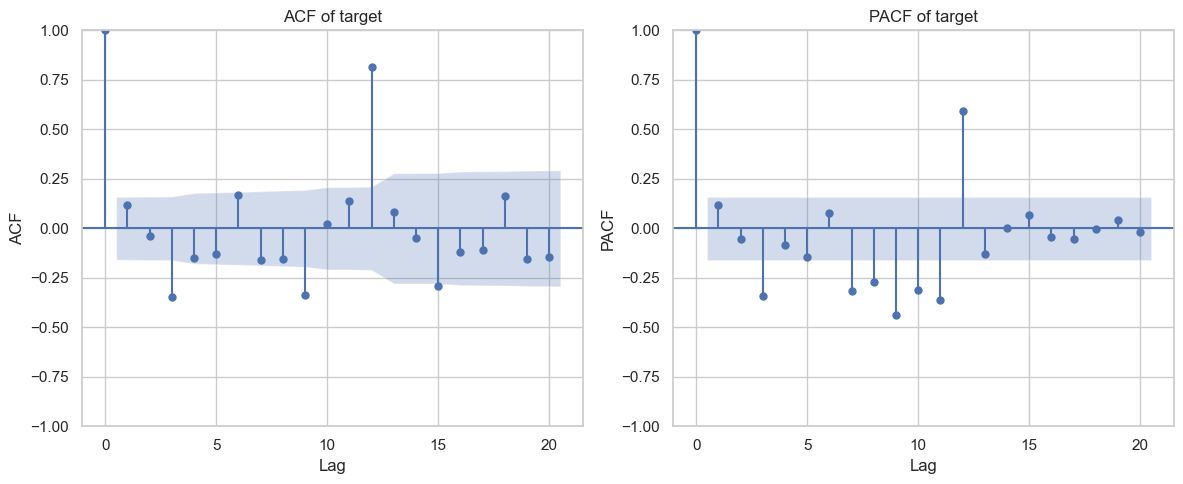

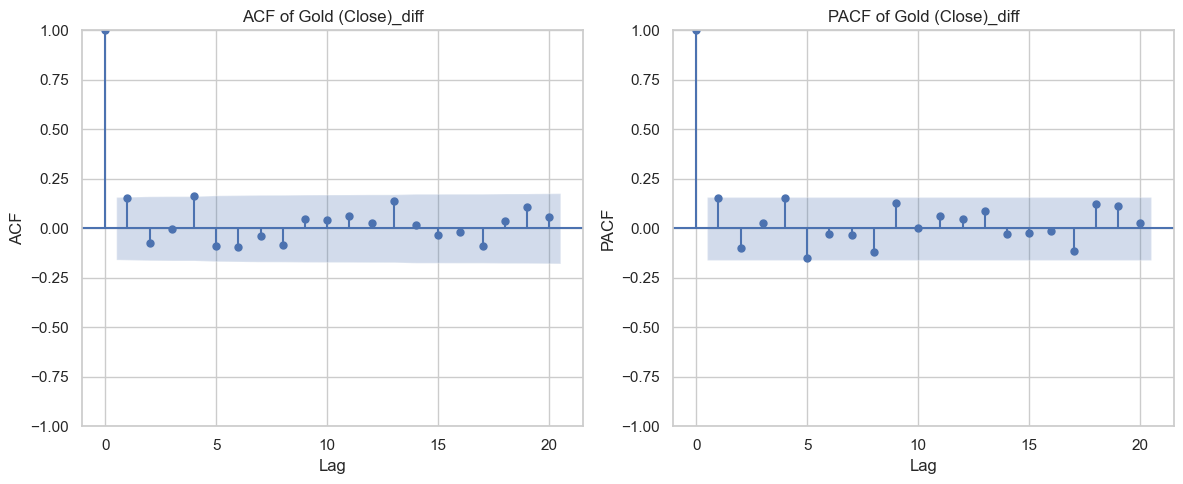

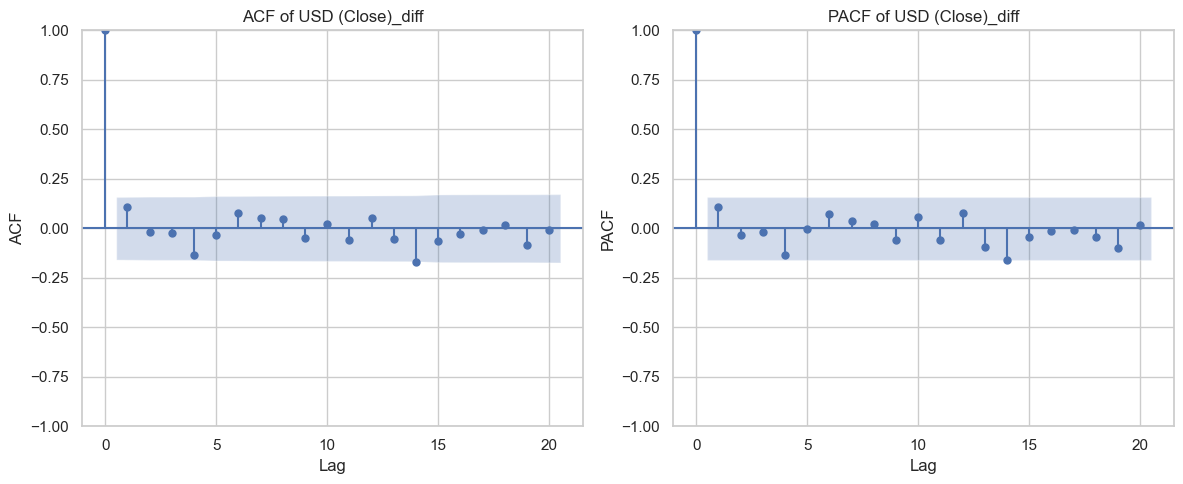

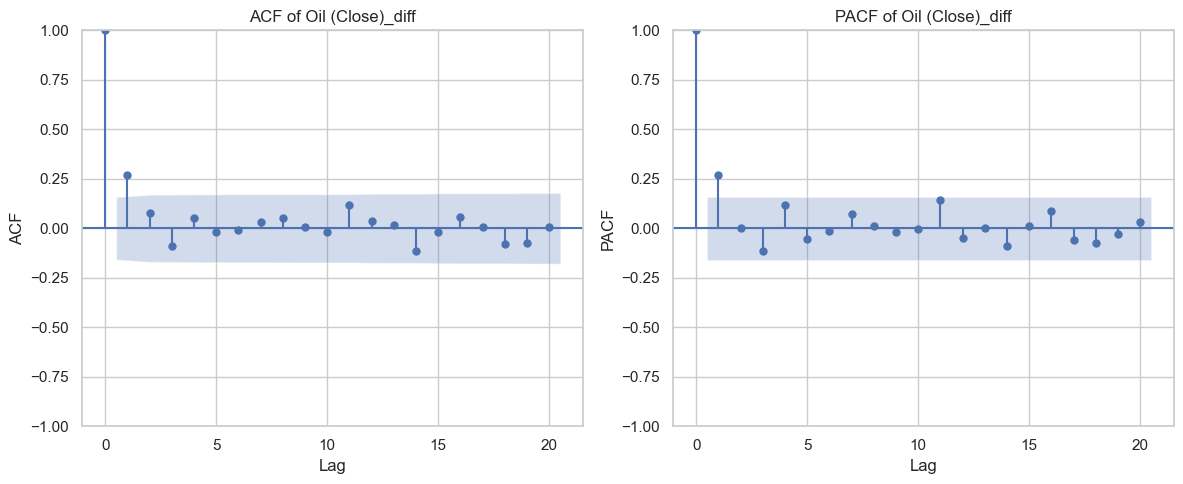

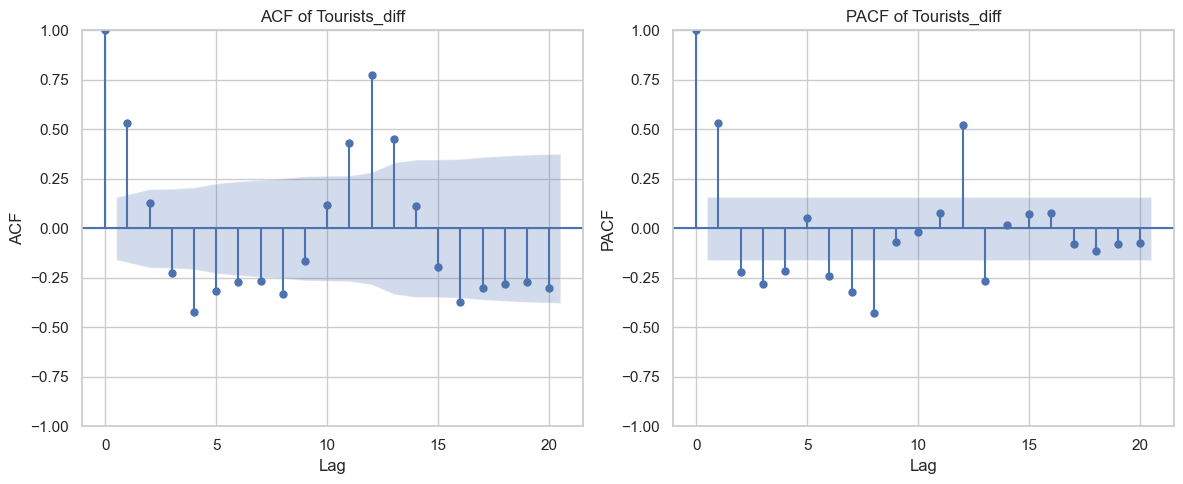

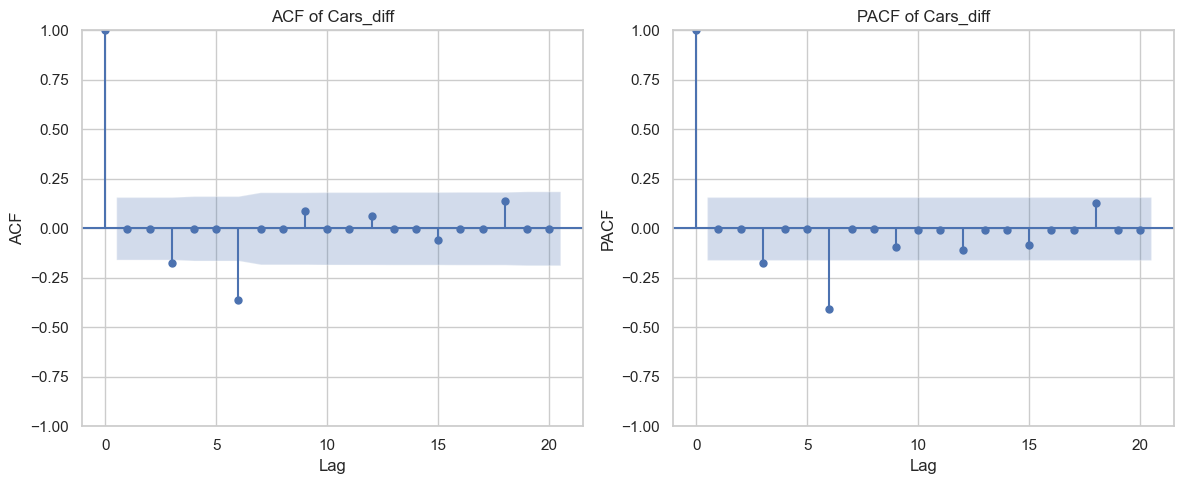

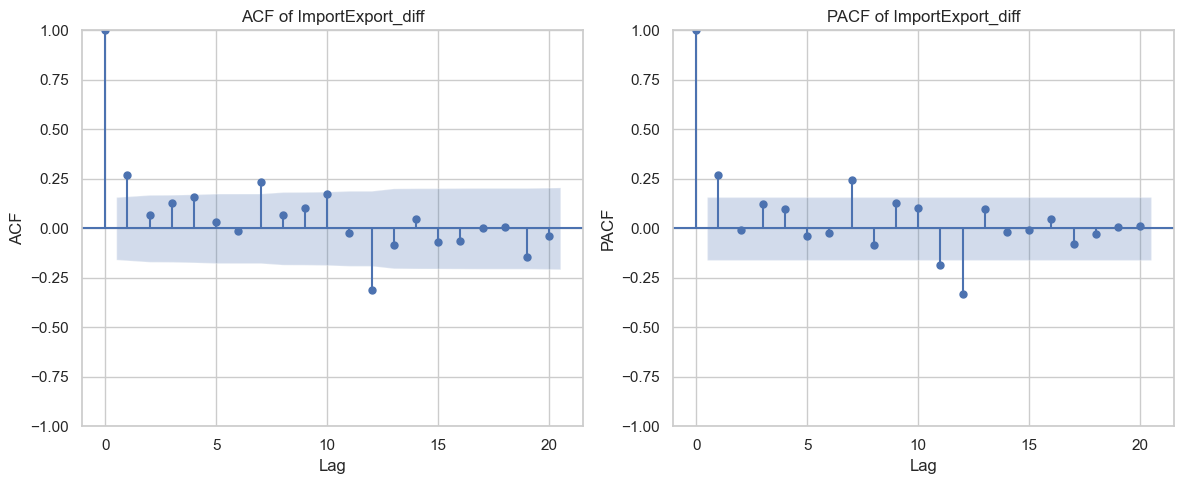

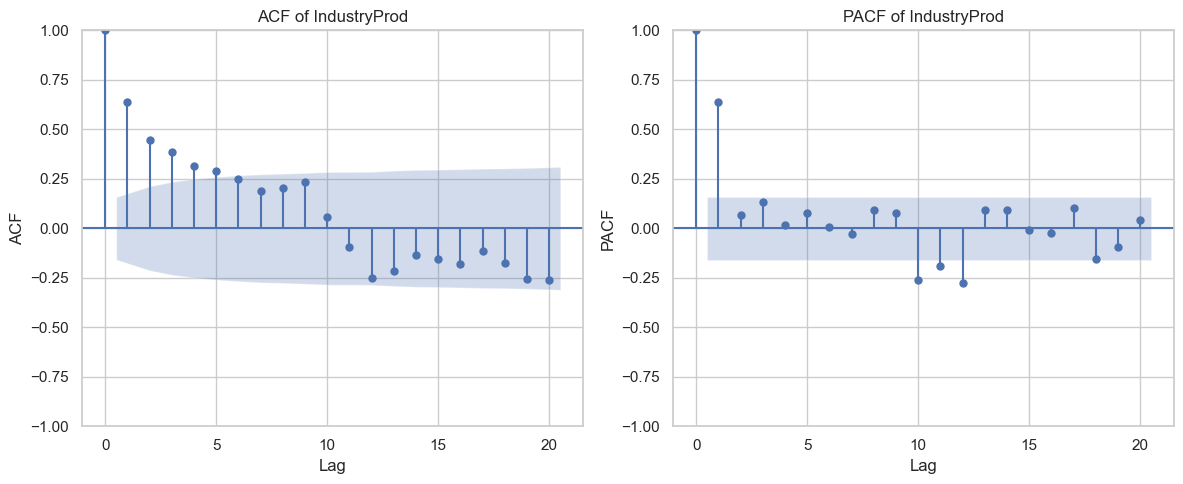

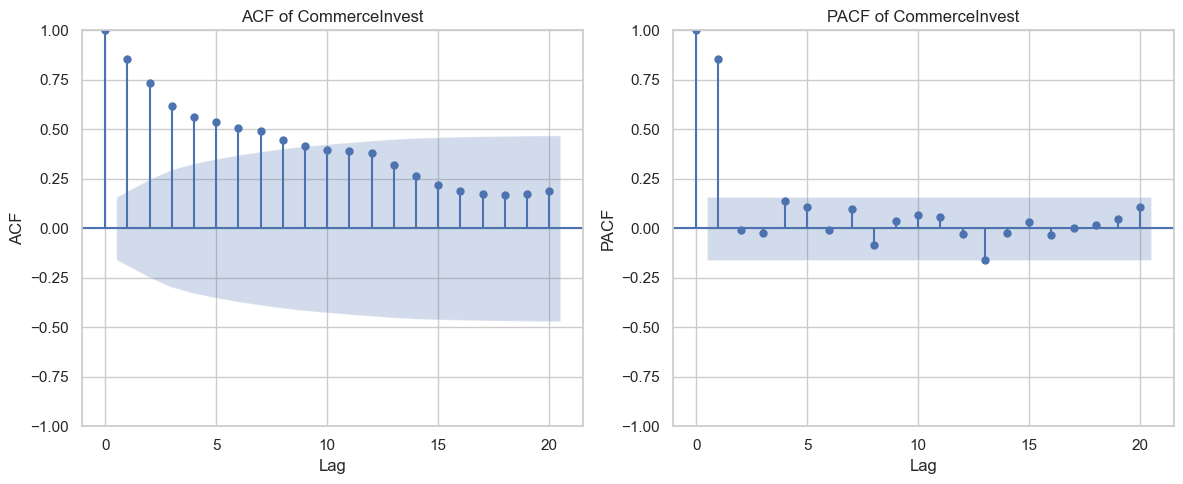

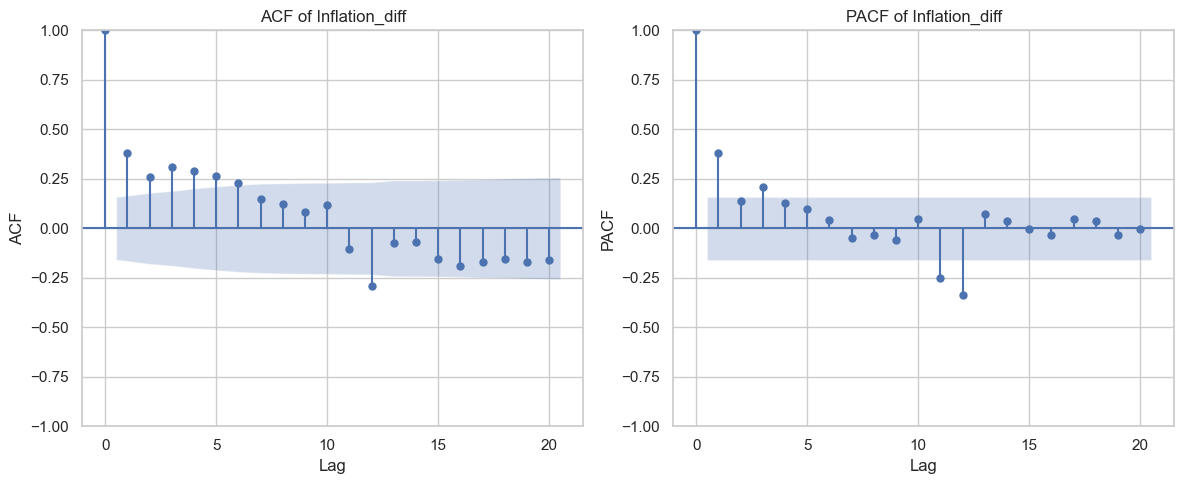

In [17]:
# Załóżmy, że mamy ramkę danych modified zawierającą zmienne target i kilka zmiennych objaśniających
explanatory_variables = modified.columns.drop('target')

# Wygenerowanie wykresów ACF i PACF dla zmiennej docelowej
plot_acf_pacf(modified, 'target')

# Wygenerowanie wykresów ACF i PACF dla zmiennych objaśniających
for var in explanatory_variables:
    plot_acf_pacf(modified, var)

Interpretacja ACF i PACF:

**ACF:**

Pokazuje ogólną korelację między obserwacjami w szeregu czasowym przy różnych opóźnieniach.
Istotne opóźnienia (lag 3, 9, 12) w ACF mogą wskazywać na powtarzające się wzorce w tych punktach.

**PACF:**

Pokazuje korelację między obserwacjami w szeregu czasowym przy różnych opóźnieniach, eliminując wpływ pośrednich opóźnień.
Istotne opóźnienia (lag 3, 7, 8, 9, 10, 11, 12) w PACF mogą sugerować bardziej bezpośredni wpływ tych opóźnień na wartości w szeregu czasowym.

In [18]:
# Istotne opóźnienia wskazane przez ACF, PACF
lags_dict = {
    'target': [3, 7, 8, 9, 10, 11, 12],
    'Oil (Close)_diff': [1],
    'Tourists_diff': [1, 2, 3, 4, 6, 7, 8, 11, 12],
    'Cars_diff': [6],
    'ImportExport_diff': [12],
    'IndustryProd': [1, 2, 3, 4, 5, 10, 11, 12],
    'CommerceInvest': [1],
    'Inflation_diff': [1, 2, 3, 4, 5, 11, 12]
}

### Tworzenie zmiennych opóźnionych

In [19]:
# Tworzenie zmiennych opóźnionych na podstawie zidentyfikowanych lagów
for var, lags in lags_dict.items():
    for lag in lags:
        modified[f'{var}_lag{lag}'] = modified[var].shift(lag)

# Sprawdzenie korelacji zmiennych z opóźnieniem z poziomem bezrobocia
correlations = modified.corr()['target'].dropna()
print(correlations)

Gold (Close)_diff         -0.014045
USD (Close)_diff           0.032748
Oil (Close)_diff          -0.117513
Tourists_diff             -0.082948
Cars_diff                 -0.143211
ImportExport_diff          0.022047
IndustryProd              -0.060815
CommerceInvest            -0.068880
Inflation_diff            -0.075276
target                     1.000000
target_lag3               -0.354854
target_lag7               -0.165093
target_lag8               -0.159997
target_lag9               -0.350586
target_lag10               0.023208
target_lag11               0.151659
target_lag12               0.903591
Oil (Close)_diff_lag1     -0.119857
Tourists_diff_lag1        -0.108027
Tourists_diff_lag2        -0.049414
Tourists_diff_lag3         0.139714
Tourists_diff_lag4         0.164612
Tourists_diff_lag6         0.356146
Tourists_diff_lag7        -0.088276
Tourists_diff_lag8        -0.145514
Tourists_diff_lag11       -0.069895
Tourists_diff_lag12       -0.012155
Cars_diff_lag6            -0

# Regresja wieloraka

### Selekcja wsteczna

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Definiujemy X (zmienne objaśniające) i y (zmienna docelowa)
X = modified[modified.columns.drop('target')].dropna()
y = modified['target'].loc[X.index]


In [28]:
# Regresja wieloraka
# Dodanie stałej do zmiennych objaśniających (potrzebne do modelu OLS)
X = sm.add_constant(X)

# Dopasowanie modelu OLS
model = sm.OLS(y, X).fit()

# Wyświetlenie wyników
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     26.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.79e-38
Time:                        13:30:44   Log-Likelihood:                -1495.5
No. Observations:                 142   AIC:                             3081.
Df Residuals:                      97   BIC:                             3214.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [29]:
# Definiowanie regresora liniowego
lr = LinearRegression()

# Inicjalizacja RFE z regresorem i liczba wybranych zmiennych
selector = RFE(lr, n_features_to_select=5, step=1)  

# Dopasowanie RFE
selector = selector.fit(X, y)

# Wybrane zmienne
selected_columns = X.columns[selector.support_]

print("Selected features:", selected_columns)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_columns]
model_selected = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_selected.summary())


Selected features: Index(['Cars_diff', 'CommerceInvest', 'Tourists_diff_lag6',
       'Tourists_diff_lag7', 'CommerceInvest_lag1'],
      dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              10.31
Date:                Sun, 02 Jun 2024   Prob (F-statistic):                    2.08e-08
Time:                        13:31:24   Log-Likelihood:                         -1655.3
No. Observations:                 142   AIC:                                      3321.
Df Residuals:                     137   BIC:                                      3335.
Df Model:                           5                                                  
Covariance Type:            nonrobust                 

In [31]:
# Definiowanie regresora liniowego
lr = LinearRegression()

# Inicjalizacja RFE z regresorem i liczba wybranych zmiennych
selector = RFE(lr, n_features_to_select=10, step=1)  

# Dopasowanie RFE
selector = selector.fit(X, y)

# Wybrane zmienne
selected_columns = X.columns[selector.support_]

print("Selected features:", selected_columns)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_columns]
model_selected = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_selected.summary())


Selected features: Index(['Cars_diff', 'CommerceInvest', 'Tourists_diff_lag3',
       'Tourists_diff_lag4', 'Tourists_diff_lag6', 'Tourists_diff_lag7',
       'Cars_diff_lag6', 'IndustryProd_lag4', 'CommerceInvest_lag1',
       'Inflation_diff_lag3'],
      dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.329
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              6.472
Date:                Sun, 02 Jun 2024   Prob (F-statistic):                    4.45e-08
Time:                        13:36:39   Log-Likelihood:                         -1649.6
No. Observations:                 142   AIC:                                      3319.
Df Residuals:                     132   BIC:                                      3349.
Df Model:             

### Selekcja do przodu

In [32]:
def forward_selection(data, target, significance_level=0.05):
    """
    Przeprowadza selekcję do przodu dla modelu regresji liniowej.
    
    Parameters:
    data (DataFrame): Ramka danych zawierająca zmienne objaśniające.
    target (Series): Zmienna docelowa.
    significance_level (float): Poziom istotności do dodawania zmiennych.

    Returns:
    list: Lista wybranych zmiennych.
    """
    initial_features = []
    remaining_features = list(data.columns)
    selected_features = initial_features[:]
    while remaining_features:
        remaining_pvalues = []
        for feature in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[selected_features + [feature]])).fit()
            remaining_pvalues.append((feature, model.pvalues[feature]))
        
        best_feature, best_pvalue = min(remaining_pvalues, key=lambda x: x[1])
        
        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features


In [33]:
# Wykonanie selekcji do przodu
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)  # Dodanie stałej
model_selected = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_selected.summary())


Selected features: ['target_lag12', 'Cars_diff', 'IndustryProd_lag2', 'IndustryProd', 'USD (Close)_diff']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           9.38e-60
Time:                        13:39:47   Log-Likelihood:                -1529.9
No. Observations:                 142   AIC:                             3072.
Df Residuals:                     136   BIC:                             3089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [34]:
# Wykonanie selekcji do przodu
selected_features = forward_selection(X, y, 0.10)
print("Selected features:", selected_features)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)  # Dodanie stałej
model_selected = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_selected.summary())


Selected features: ['target_lag12', 'Cars_diff', 'IndustryProd_lag2', 'IndustryProd', 'USD (Close)_diff', 'CommerceInvest_lag1', 'CommerceInvest', 'Inflation_diff_lag1', 'Cars_diff_lag6', 'Inflation_diff_lag4', 'IndustryProd_lag1', 'IndustryProd_lag4']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     98.15
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           9.61e-59
Time:                        13:43:03   Log-Likelihood:                -1513.5
No. Observations:                 142   AIC:                             3053.
Df Residuals:                     129   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobus

# Drzewa decyzyjne

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [55]:
# Załóżmy, że mamy ramkę danych 'df' z zmienną docelową 'target' i zmiennymi objaśniającymi
# Wybieramy kolumny z opóźnionymi zmiennymi (wszystkie kolumny oprócz 'target')
explanatory_cols = [col for col in modified.columns if col != 'target']

# Definiujemy X (zmienne objaśniające) i y (zmienna docelowa)
X = modified[modified.columns.drop('target')].dropna()
y = modified['target'].loc[X.index]

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
explanatory_cols = modified.columns.drop('target')

# Inicjalizacja modelu drzewa decyzyjnego
tree_model = DecisionTreeRegressor(random_state=42)

# Trenowanie modelu na danych treningowych
tree_model.fit(X_train, y_train)

# Ocenianie ważności zmiennych
importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': explanatory_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Importance of features (Decision Tree):\n", feature_importance_df)


Importance of features (Decision Tree):
                     Feature  Importance
15             target_lag12    0.790504
14             target_lag11    0.047717
20       Tourists_diff_lag4    0.047083
5         ImportExport_diff    0.029328
43     Inflation_diff_lag12    0.012976
13             target_lag10    0.010157
27  ImportExport_diff_lag12    0.008736
10              target_lag7    0.008643
29        IndustryProd_lag2    0.008596
9               target_lag3    0.006878
24      Tourists_diff_lag11    0.005313
8            Inflation_diff    0.004099
17       Tourists_diff_lag1    0.003161
2          Oil (Close)_diff    0.002409
32        IndustryProd_lag5    0.002357
12              target_lag9    0.002317
31        IndustryProd_lag4    0.002143
38      Inflation_diff_lag2    0.001306
39      Inflation_diff_lag3    0.000943
11              target_lag8    0.000844
16    Oil (Close)_diff_lag1    0.000832
36      CommerceInvest_lag1    0.000785
7            CommerceInvest    0.000512

In [57]:
# Las losowy

# Inicjalizacja modelu lasu losowego
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
forest_model.fit(X_train, y_train)

# Ocenianie ważności zmiennych
importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': explanatory_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Importance of features (Random Forest):\n", feature_importance_df)


Importance of features (Random Forest):
                     Feature  Importance
15             target_lag12    0.804052
20       Tourists_diff_lag4    0.033988
13             target_lag10    0.023040
14             target_lag11    0.016082
10              target_lag7    0.008992
0         Gold (Close)_diff    0.008912
5         ImportExport_diff    0.007477
29        IndustryProd_lag2    0.007018
27  ImportExport_diff_lag12    0.006718
21       Tourists_diff_lag6    0.005536
34       IndustryProd_lag11    0.005456
25      Tourists_diff_lag12    0.004846
35       IndustryProd_lag12    0.004818
23       Tourists_diff_lag8    0.004519
9               target_lag3    0.003350
43     Inflation_diff_lag12    0.003115
16    Oil (Close)_diff_lag1    0.003075
19       Tourists_diff_lag3    0.002998
26           Cars_diff_lag6    0.002948
17       Tourists_diff_lag1    0.002860
7            CommerceInvest    0.002718
40      Inflation_diff_lag4    0.002596
31        IndustryProd_lag4    0.002455

# Wyjaśnienie za pomocą SHAP

Utworzenie modeli ze wskazanych wcześniej zmiennych i wyjaśnienie ich za pomocą SHAP.

In [ ]:
# all variables will be predicators
X = scaled_df
y = df['Unemployed'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# evaluate model on test set
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
res = pd.DataFrame(y_test)
res['y_pred'] = y_pred

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.lineplot(res)
plt.show()

In [ ]:
import shap

# Inicjalizacja Explainera SHAP z wytrenowanym modelem
explainer = shap.Explainer(model1, X_train) 

# Obliczenie wartości SHAP
shap_values = explainer(X_test)

# Wyświetlenie wyników
shap.summary_plot(shap_values, X_test)


In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.plots.waterfall(shap_values[6])

### Regresja liniowa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Przygotowanie danych do modelu
X = df.drop(columns=['Unemployed'])
y = df['Unemployed']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trening modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywania na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

# Wagi cech (wpływ poszczególnych czynników)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


# Wnioski

- Sformułowanie celu projektu
- Jakie badania przeprowadzono
- Hipotezy badawcze (np. powiązanie okresu letniego w turystyce z mniejszym bezrobociem etc.)
- Wyniki analizy i identyfikacja kluczowych czynników wpływających na poziom bezrobocia